#1. Batch Normalization

In [1]:
# # DO NOT run this code!!
# # nn layers
# linear1 = torch.nn.Linear(784, 32, bias=True)
# linear2 = torch.nn.Linear(32, 32, bias=True)
# linear3 = torch.nn.Linear(32, 10, bias=True)

# relu = torch.nn.ReLU()
# bn1 = torch.nn.BatchNorm1d(32) # Batch Normalization for 1D data
# bn2 = torch.nn.BatchNorm1d(32)

# nn_linear1 = torch.nn.Linear(784, 32, bias=True)
# nn_linear2 = torch.nn.Linear(32, 32, bias=True) nn_linear3 = torch.nn.Linear(32, 10, bias=True)


# # model
# # torch.nn.Seqeuntial is kind of a "stack" operation of layers
# # We usually apply ReLU after the BN, but it's not a must!
# bn_model = torch.nn.Sequential(linear1, bn1, relu,
#                               linear2, bn2, relu,
#                               linear3).to(device)
# # Model w.o. BN
# # Linear + ReLU is a convention
# nn_model = torch.nn.Sequential(nn_linear1, relu,
#                                nn_linear2, relu,
#                                nn_linear3).to(device)

In [6]:
# If not using torch.nn.Sequential, you can use class module!

import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # in __init__, initialize the layers you'd like to use
        self.fc1 = nn.Linear(100, 50)
        self.bn = nn.BatchNorm1d(num_features=50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # in forward, place the layers sequentially
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [12]:
import torch
# BN 1D
m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output1 = m(input)

# BN 2D
# So far, we've only used BN 1D
# But what's BN 2D??
m = nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)
output2 = m(input)

In [13]:
output1.shape

torch.Size([20, 100])

In [14]:
output2.shape

torch.Size([20, 100, 35, 45])

Question 1. Compare & Contrast BatchNorm1d and Batchnorm2d

BatchNorm1d와 BatchNorm2d는 input data와 output data의 dimension에서 차이가 있다. BatchNorm1d는 데이터의 dimension이 1이고, BatchNorm2d는 data의 dimension이 2이다. 따라서 코드로 input과 output을 표현할 때 그 형태에서도 차이가 발생한다.

BatchNorm1d의 경우 input data와 output data가 (N, C)또는 (N, C, L)의 형태로 나타나고, BatchNorm2d의 경우에는 input data와 output data가 (N, C, H, W)의 형태로 나타난다. 여기서 N은 배치의 크기, C는 channel의 개수, L은 length, H는 height, W는 width를 의미한다.

# 2. Weight Initialization

In [15]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(1,16,3,padding=1),
            # input channel의 개수 : 1, output channel의 개수 : 16, kernel size : 3x3, padding 적용
            nn.ReLU(),  # activation function : ReLU after convolutional layer
            nn.Conv2d(16,32,3,padding=1),
            # input channel의 개수 : 16, output channel의 개수 : 32, kernel size : 3x3, padding 적용
            nn.ReLU(),  # activation function : ReLU after convolutional layer
            nn.MaxPool2d(2,2),  # 2x2 filter를 이용해 max pooling -> data size가 1/4로 감소
            nn.Conv2d(32,64,3,padding=1),
            # input channel의 개수 : 32, output channel의 개수 : 64, kernel size : 3x3, padding 적용
            nn.ReLU(),  # activation function : ReLU after convolutional layer
            nn.MaxPool2d(2,2)   # 2x2 filter를 이용해 max pooling -> data size가 1/4로 감소
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64*7*7,100),
            # fully connected layer
            # input size 64*7*7(channel의 개수 64개, 전 단계의 output size : 7x7 by max pooling), output size : 100
            nn.ReLU(),   # activation function : ReLU after fully connected layer
            nn.Linear(100,10)
            # fully connected layer
            # input size 100, output size : 10
        )

        if isinstance(m, nn.Conv2d):  # 만약 nn.Conv2d 모듈이라면

                init.kaiming_normal_(m.weight.data)  # weight를 kaiming he normal을 이용해 initialize
                m.bias.data.fill_(0)  # bias는 0으로 initialize

        elif isinstance(m, nn.Linear):  # 만약 nn.Linear 모듈이라면

                init.kaiming_normal_(m.weight.data)  # weight를 kaiming he normal을 이용해 initialize
                m.bias.data.fill_(0)  # bias는 0으로 initialize

    def forward(self,x):  # forward pass
        out = self.layer(x)  # convoultional layer
        out = out.view(batch_size,-1)  # 이전 단계의 output data를 flatten
        out = self.fc_layer(out) # fully connected layer
        return out

In [17]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)

def weight_init(method=None):
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

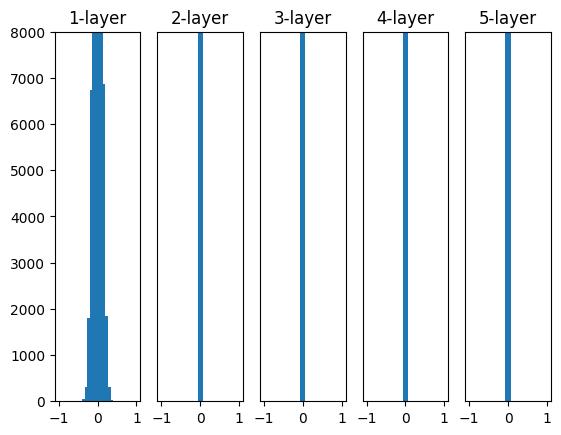

In [20]:
# Small method, tanh
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

위의 코드는 activation function을 tanh로 설정한 경우를 나타낸다. input data는 1000개의 sample과 100개의 feature로 구성되어 있고 각 layer의 노드의 개수는 100개, hidden layer의 개수는 5개이다. 이 때, weight initialization은 "small" method를 사용한다. 아래의 histogram plotting을 확인해보면 두번째 layer부터 모든 output값이 0으로 출력되는 것을 확인할 수 있다. 따라서 학습이 제대로 진행되지 않는다.

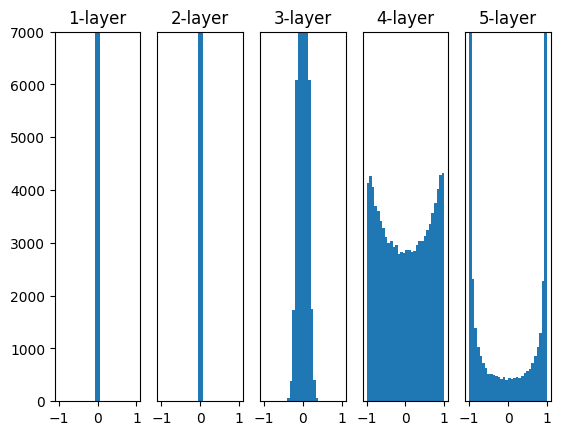

In [21]:
# Large method, tanh
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

위의 경우도 마찬가지로 activation function으로 tanh를 적용한다. 이 때 weight initialization은 "large" method를 이용하는데 결과를 확인해보면 layer가 진행될수록 output 값이 -1과 1에 몰린다는 것을 알 수 있는데 이 경우에는 gradient 값이 0에 가까워져 vanishing gradient problem이 발생할 수 있다.

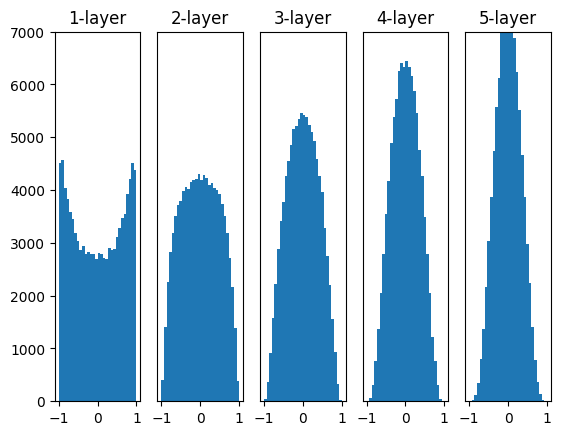

In [23]:
# Xavier Initialization, ReLU
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

다음의 경우도 이전의 두가지 경우와 마찬가지로 activation function으로 tanh를 적용한다. 이 때 weight initialization의 method로 Xavier initialization을 사용하는데 결과 값들을 확인해보면 (-1, 1) 범위 내에서 이전의 경우보다 고르게 분포하는 것을 알 수 있다. 따라서 이 경우 더 유의미한 학습이 가능해진다.

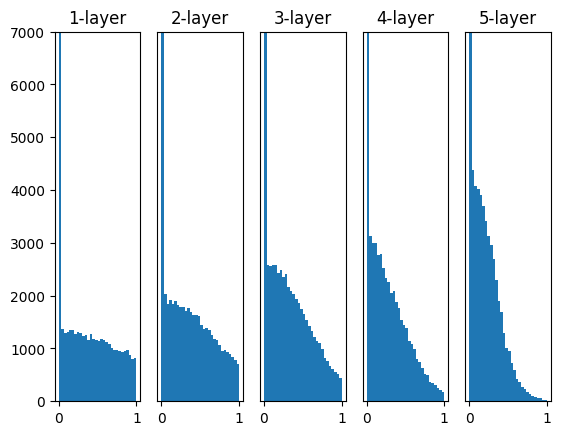

In [24]:
# He Initialization, ReLU
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

위의 경우에는 이전의 경우들과는 다르게 acticvation function으로 ReLU를 사용함을 알 수 있다. ReLU를 사용할 때 weight initialization으로 Xavier initialiaztion을 사용하면 deep한 layer로 갈수록 출력 값이 0에 가까워지는 것을 확인할 수 있다. 따라서 이 경우에는 weight initialization 으로 He initialization method를 사용한다. 출력된 output data를 확인해보면 Xavier initialization을 사용할 때보다 더 고르게 분포하고 있는 것을 확인할 수 있다.

# 3. CNN

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1)
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
    self.fc1 = nn.Linear(10 * 12 * 12, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.conv1(x))
    print("After conv1", x.size())
    x = F.relu(self.conv2(x))
    print("After conv2",x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
After dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


batch size : 10

after convolution 1 : channel의 개수가 3개로 바뀌고, 원래 20x20 size의 데이터에서 5x5 kernel로 1칸씩 이동하면서 convolution을 진행하기 때문에 output data의 size가 16x16으로 변한다.

after convolution 2 : channel의 개수가 10개로 바뀌고, conv1과 마찬가지로 5x5 kernel로 한 칸씩 이동하면서 convolution을 진행하므로 데이터의 size가 16x16에서 12x12로 바뀐다.

after fc1 : 이전 단계에서의 데이터가 12x12 size, 10 channel이므로 이를 flatten 하면 데이터의 size가 12x12x10=1440 이 된다. 따라서 이 데이터들이 fully connected layer를 지나면 size가 50으로 변한다.

after fc2 : 데이터의 size가 50 -> 10 으로 변한다.

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size=2)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(10 * 5 * 5, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x))
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x))
    print("After max_pool2",x.size())
    x = x.view(-1, 10 * 5 * 5)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))

Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


batch size : 10

after max_pool1 : 20x20 size 데이터를 2x2 kernel을 이용해 max pooling 하므로 width와 height 모두 1/2만큼 감소하여 10x10 으로 변한다.

after max_pool2 : 마찬가지로 10x10 size 데이터를 2x2 kernel을 이용해 max pooling 하므로 width와 height 모두 1/2만큼 감소하여 5x5 로 변한다.

after fc1 : flatten한 10* 5 *5 size input data가 size 50의 output data로 출력된다.

after fc2 : size 50의 input data가 size 10의 output data로 출력된다.

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [29]:
train_data = datasets.MNIST('./data/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6029785.87it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159096.21it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1510577.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3386760.67it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [31]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [32]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.3166518211364746
loss of 0 epoch, 100 index : 1.8804436922073364
loss of 0 epoch, 200 index : 0.5553153157234192
loss of 0 epoch, 300 index : 0.36640167236328125
loss of 0 epoch, 400 index : 0.6219720840454102
loss of 0 epoch, 500 index : 0.29447609186172485
loss of 0 epoch, 600 index : 0.3189466595649719
loss of 0 epoch, 700 index : 0.4725205898284912
loss of 0 epoch, 800 index : 0.10380294173955917
loss of 0 epoch, 900 index : 0.30193576216697693
loss of 0 epoch, 1000 index : 0.09576801210641861
loss of 0 epoch, 1100 index : 0.18069355189800262
loss of 1 epoch, 0 index : 0.17867624759674072
loss of 1 epoch, 100 index : 0.029372302815318108
loss of 1 epoch, 200 index : 0.14451761543750763
loss of 1 epoch, 300 index : 0.11015874892473221
loss of 1 epoch, 400 index : 0.028157666325569153
loss of 1 epoch, 500 index : 0.15155981481075287
loss of 1 epoch, 600 index : 0.05890939384698868
loss of 1 epoch, 700 index : 0.018654758110642433
loss of 1 epoch, 800 inde

In [33]:
cnn.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    output = cnn(data)
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1, keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 7.1698, Accuracy: 9886/10000 (99%)



test data를 통해 evaluation을 진행한다. evaluation을 통해 계산한 test loss와 accuracy를 쌓기 위해 초기의 test_loss값과 correct 값을 0으로 initialize한다. evaluation을 진행할 때는 gradient 계산을 하지 않는다. cnn 계산을 통해 test data에 대한 output 값을 출력하고 이를 target 값과 비교하여 test_loss와 correct 값을 계산한다. 이후 계산한 loss 값의 평균과 accuracy 를 출력한다.